# Exercise 1 (10 points)

In this exercise, we will practice how to test a function in Python. Imagine you have a function `normalize_data()` that takes in a `pandas` DataFrame and normalizes each column (scales the data so that the values in each column are between 0 and 1). You want to test this function to ensure it works correctly.


```
import pandas as pd

def normalize_data(df):
    return (df - df.min()) / (df.max() - df.min())
```

Write a test function using `assert` statements to verify that:

- Each column's minimum value is 0 and maximum value is 1 after normalization.
- The function raises an error if the input is not a DataFrame.
- The function does not alter the original DataFrame.



In [6]:
import pandas as pd

def normalize_data(df):
    return (df - df.min()) / (df.max() - df.min())

In [11]:
def test_fun():
    
    df = pd.DataFrame({
        'A': [1,2,3,4,5],
        'A': [100,200,300,400,500],
        'A': [1000,2000,3000,4000,5000],
    })
    data_copy = df.copy()
    
    df_normalized = normalize_data(df)
    
    #test 1
    assert (df_normalized.min().min() == 0), 'the min value of the normalized data should be 0'
    assert (df_normalized.max().max() == 1), 'the max value of the normalized data should be 1'
    
    #test 2
    try:
        #normalize_data([1,2,3,4,5])
        normalize_data(df)
    except Exception as e:
        assert isinstance(e, TypeError), 'the function should return and AttributeError when input is not a dataframe'
        
    #test 3
    assert df.equals(data_copy), 'the function should not modift the original df'
    
    print('all test passed')
    
test_fun()

all test passed


# Exercise 2

In this exercise, we will practice data visualiation with the `credit_card_transactions_India.csv` data file. This dataset contains insights into a collection of credit card transactions made in India, offering a comprehensive look at the spending habits of Indians across the nation. From the Gender and Card type used to carry out each transaction, to which city saw the highest amount of spending and even what kind of expenses were made, this dataset paints an overall picture about how money is being spent in India today. A brief description of the features is shown below.

- `City`: The city in which the transaction took place. 
- `Date`: The date of the transaction. 
- `Card Type`: The type of credit card used for the transaction.
- `Exp Type`: The type of expense associated with the transaction. 
- `Gender`: The gender of the cardholder. 
- `Amount`: The amount of the transaction.

### Exercise 2(a) (2 points)

Load `pandas`, `matplotlib`, and `seaborn`.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Exercise 2(b) (2 points)

Read the `credit_card_transactions_India.csv` data file and create a data frame called `credit`.

In [2]:
credit = pd.read_csv('credit_card_transactions_India.csv')
credit.head()

,index,City,Date,Card Type,Exp Type,Gender,Amount
0,0,"Delhi, India",29-Oct-14,Gold,Bills,F,82475
1,1,"Greater Mumbai, India",22-Aug-14,Platinum,Bills,F,32555
2,2,"Bengaluru, India",27-Aug-14,Silver,Bills,F,101738
3,3,"Greater Mumbai, India",12-Apr-14,Signature,Bills,F,123424
4,4,"Bengaluru, India",5-May-15,Gold,Bills,F,171574


### Exercise 2(c) (3 points)

Convert `Date` to `date-time` format.

In [12]:
credit['Date'] = pd.to_datetime(credit['Date'],format='%d-%b-%y')
credit.head()

,index,City,Date,Card Type,Exp Type,Gender,Amount
0,0,"Delhi, India",2014-10-29,Gold,Bills,F,82475
1,1,"Greater Mumbai, India",2014-08-22,Platinum,Bills,F,32555
2,2,"Bengaluru, India",2014-08-27,Silver,Bills,F,101738
3,3,"Greater Mumbai, India",2014-04-12,Signature,Bills,F,123424
4,4,"Bengaluru, India",2015-05-05,Gold,Bills,F,171574


### Exercise 2(d) (3 points)

Select credit card transaction in `Delhi, India` and create a data frame called `Delhi`.

In [13]:
Delhi = pd.DataFrame(credit[credit['City']== 'Delhi, India'])
Delhi.head()

,index,City,Date,Card Type,Exp Type,Gender,Amount
0,0,"Delhi, India",2014-10-29,Gold,Bills,F,82475
5,5,"Delhi, India",2014-09-08,Silver,Bills,F,100036
6,6,"Delhi, India",2015-02-24,Gold,Bills,F,143250
8,8,"Delhi, India",2014-03-28,Silver,Bills,F,192247
9,9,"Delhi, India",2014-09-01,Platinum,Bills,F,67932


### Exercise 2(e) (3 points)

Create a frequency table of `Card Type` of the `Delhi` data frame.

In [15]:
Delhi['Card Type'].value_counts(normalize=True)*100

Card Type
Silver       27.455485
Signature    25.043079
Gold         24.784607
Platinum     22.716829
Name: proportion, dtype: float64

### Exercise 2(e) (6 points)

Create a time-series plot of `Amount` based on the different `Card Type`.

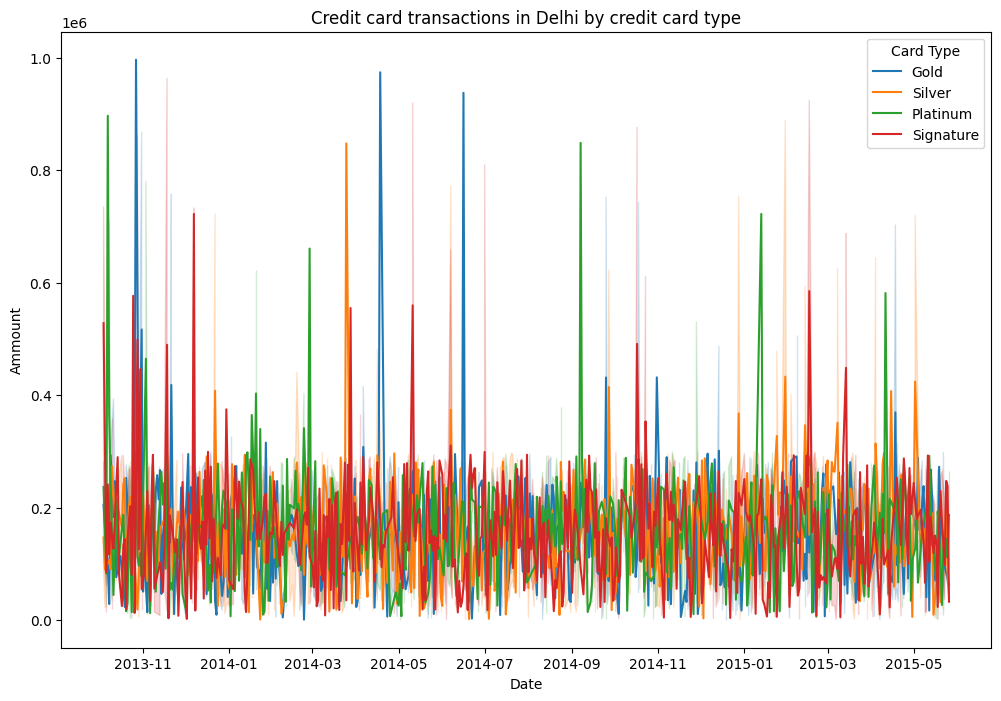

In [19]:
fig, ax = plt.subplots(figsize = (12,8))

sns.lineplot(x='Date', y='Amount', data=Delhi, hue='Card Type', ax=ax)
plt.title('Credit card transactions in Delhi by credit card type')
plt.xlabel('Date')
plt.ylabel('Ammount')
plt.show()

### Exercise 2(f) (6 points)

Create a time-series plot of `Amount` based on `Gender`.

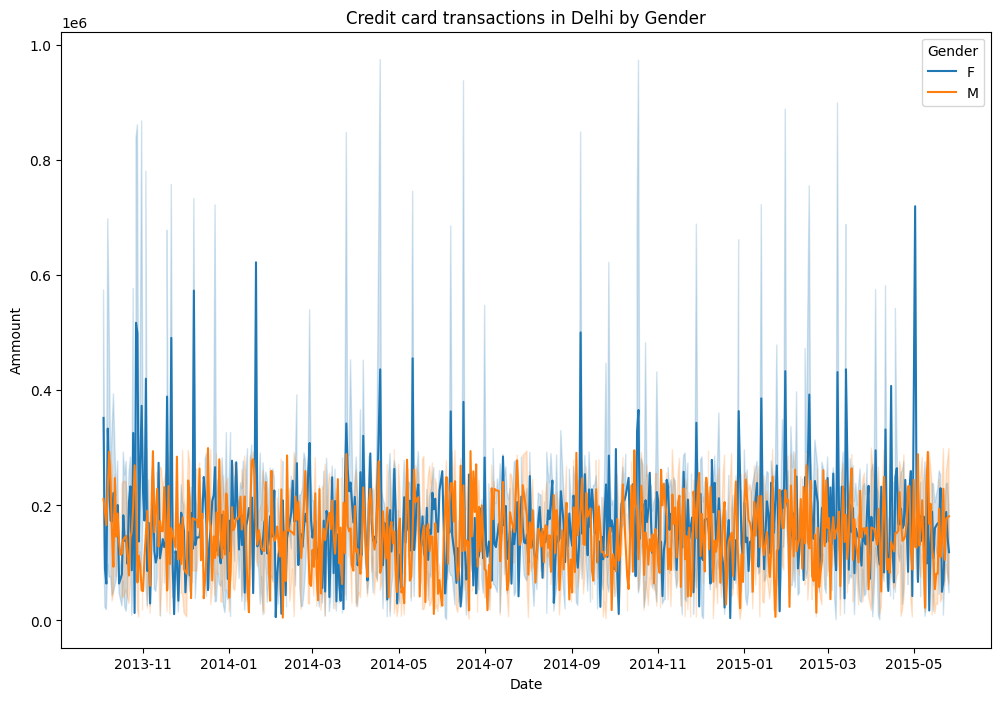

In [20]:
fig, ax = plt.subplots(figsize = (12,8))

sns.lineplot(x='Date', y='Amount', data=Delhi, hue='Gender', ax=ax)
plt.title('Credit card transactions in Delhi by Gender')
plt.xlabel('Date')
plt.ylabel('Ammount')
plt.show()